In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [15]:
dados = pd.read_csv("data/t1.csv")
dados

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [16]:
dados.rename(columns={
    'Date/Time':'Data - Hora',
    'LV ActivePower (kW)':'Força de Ativação',
    'Wind Speed (m/s)':'Velocidade Vento',
    'Theoretical_Power_Curve (KWh)':'Força Ideal',
    'Wind Direction (°)':'Direção do Vento'
    
}, inplace=True)
dados.head()

,Data - Hora,Força de Ativação,Velocidade Vento,Força Ideal,Direção do Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


<AxesSubplot:>

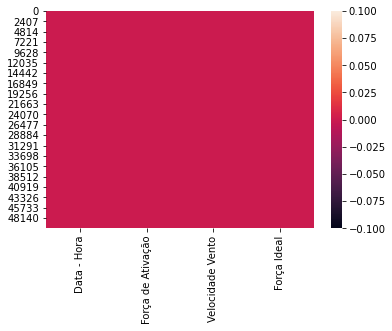

In [17]:
del dados['Direção do Vento']
# Verificar campos vazios
sns.heatmap(dados.isnull())

In [18]:
dados.describe()

,Força de Ativação,Velocidade Vento,Força Ideal
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


In [19]:
dados['Data - Hora'] = pd.to_datetime(dados['Data - Hora'])
dados.head()

,Data - Hora,Força de Ativação,Velocidade Vento,Força Ideal
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


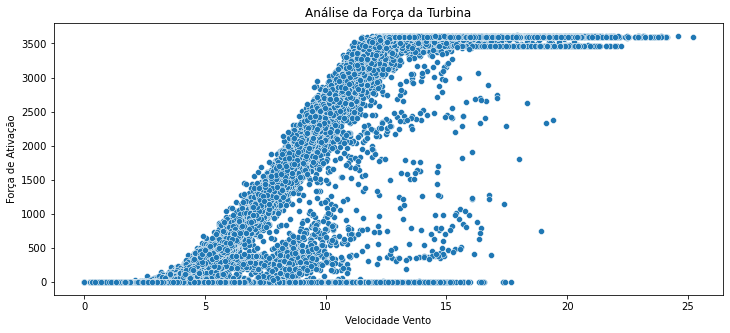

In [24]:
# Gráfico de dispersão - mostrando o funcionamento da turbina por minutos
plt.figure(figsize=(12,5))
sns.scatterplot(data=dados, x ='Velocidade Vento', y='Força de Ativação')
plt.title('Análise da Força da Turbina');


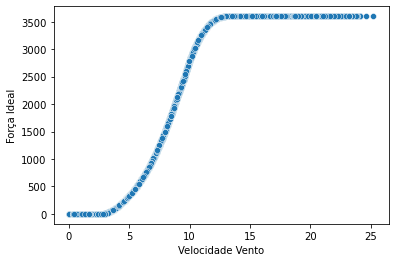

In [25]:
# gráfico de dispersão - mostrando a força ideal da turbina
sns.scatterplot(data=dados, x='Velocidade Vento',y='Força Ideal');

In [30]:
# Criando limite aceitáveis('max','min') para o funcionamento da turbina
potencia_real = dados['Força de Ativação'].tolist()
potencia_teorica = dados['Força Ideal'].tolist()

pot_min = []
pot_max = []
limite_permitido = []

for potencia in potencia_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)
    
for p, potencia in enumerate(potencia_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        limite_permitido.append('Dentro')
    elif potencia == 0:
        limite_permitido.append('Zero')
    else:
        limite_permitido.append('Fora')
        
print(limite_permitido.count('Dentro')/len(limite_permitido))

0.37286760340391845


In [31]:
# Gerar coluna com limite permitido
dados['limite_permitido'] = limite_permitido
display(dados)

,Data - Hora,Força de Ativação,Velocidade Vento,Força Ideal,limite_permitido
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


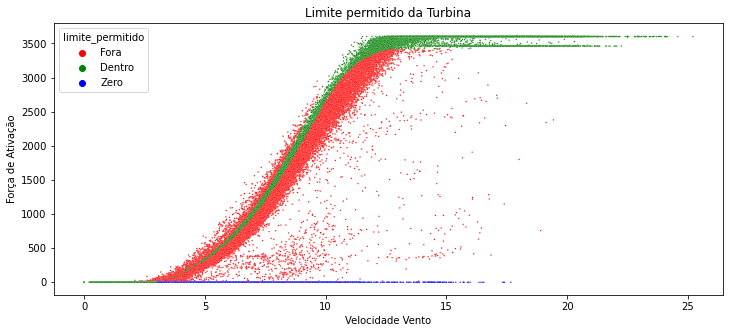

In [35]:
# Gráfico com o límite permitido da turbina
cores = {'Dentro':'green','Fora':'red','Zero':'blue'}
plt.figure(figsize=(12,5))
sns.scatterplot(data=dados, x ='Velocidade Vento', y='Força de Ativação', hue='limite_permitido', s=2, palette=cores)
plt.title('Limite permitido da Turbina');